No handles with labels found to put in legend.


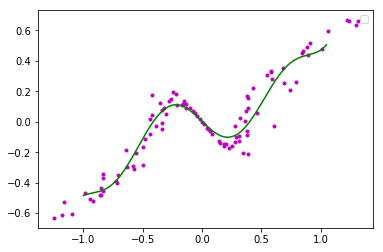

In [2]:
# coding=utf-8
 
'''
作者:Jairus Chan
程序:多项式曲线拟合算法
'''
import matplotlib.pyplot as plt
import math
import numpy
import random
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
#阶数为9阶
order=9
 
#生成曲线上的各个点
x = numpy.arange(-1,1,0.02)
y = [((a*a-1)*(a*a-1)*(a*a-1)+0.5)*numpy.sin(a*2) for a in x]
#ax.plot(x,y,color='r',linestyle='-',marker='')
#,label="(a*a-1)*(a*a-1)*(a*a-1)+0.5"
 
#生成的曲线上的各个点偏移一下，并放入到xa,ya中去
i=0
xa=[]
ya=[]
for xx in x:
	yy=y[i]
	d=float(random.randint(60,140))/100
	#ax.plot([xx*d],[yy*d],color='m',linestyle='',marker='.')
	i+=1
	xa.append(xx*d)
	ya.append(yy*d)
 
'''for i in range(0,5):
	xx=float(random.randint(-100,100))/100
	yy=float(random.randint(-60,60))/100
	xa.append(xx)
	ya.append(yy)'''
 
ax.plot(xa,ya,color='m',linestyle='',marker='.')
 
 
#进行曲线拟合
matA=[]
for i in range(0,order+1):
	matA1=[]
	for j in range(0,order+1):
		tx=0.0
		for k in range(0,len(xa)):
			dx=1.0
			for l in range(0,j+i):
				dx=dx*xa[k]
			tx+=dx
		matA1.append(tx)
	matA.append(matA1)
 
#print(len(xa))
#print(matA[0][0])
matA=numpy.array(matA)
 
matB=[]
for i in range(0,order+1):
	ty=0.0
	for k in range(0,len(xa)):
		dy=1.0
		for l in range(0,i):
			dy=dy*xa[k]
		ty+=ya[k]*dy
	matB.append(ty)
 
matB=numpy.array(matB)
 
matAA=numpy.linalg.solve(matA,matB)
 
#画出拟合后的曲线
#print(matAA)
xxa= numpy.arange(-1,1.06,0.01)
yya=[]
for i in range(0,len(xxa)):
	yy=0.0
	for j in range(0,order+1):
		dy=1.0
		for k in range(0,j):
			dy*=xxa[i]
		dy*=matAA[j]
		yy+=dy
	yya.append(yy)
ax.plot(xxa,yya,color='g',linestyle='-',marker='')
 
ax.legend()
plt.show()
